In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv("./heart.csv")

In [3]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# Checking for messing values
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Normalizing data
We use Min Max normalization technique.

In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
data["target"] = data["target"].astype("int64")

In [6]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333,1
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667,1
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667,1
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667,1
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667,1


# Spliting data into training and testing.

In [7]:
from sklearn.model_selection import train_test_split
x = data.drop("target",axis=1)
y = data["target"]

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=1,test_size=0.3)

# Create a function that creates a seaborn heatmap from a confusion matrix.

In [8]:
from sklearn.metrics import confusion_matrix
def plot_confusionMatrix(y_true,y_pred):
    cn = confusion_matrix(y_true=y_true,y_pred=y_pred)
    
    fig,ax = plt.subplots(figsize=(5,5))
    sns.heatmap(cn,annot=True,linewidths=1.5)
    plt.show()
    return cn

In [9]:
score_list = {} # This dict will save the score values to display it at the end.

# KNN Classification

In [10]:
from sklearn.neighbors import KNeighborsClassifier 
KNN = KNeighborsClassifier(n_neighbors=22)

KNN.fit(x_train,y_train)
knn_score = KNN.score(x_test,y_test)
score_list["KNN Classifier"] = knn_score
print(f"Score is {knn_score}")

Score is 0.7582417582417582


KNN score is 75%

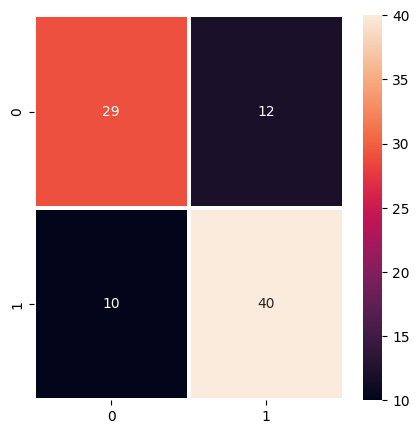

array([[29, 12],
       [10, 40]], dtype=int64)

In [11]:
y_true = y_test
y_pred = KNN.predict(x_test)
plot_confusionMatrix(y_true,y_pred)

# SVM Classification

In [12]:
from sklearn.svm import SVC 

svc = SVC()
svc.fit(x_train,y_train)
svc_score = svc.score(x_test,y_test)
score_list["SVC"] = svc_score
print(f"Score is {svc_score}")

Score is 0.7472527472527473


SVM score is 74%

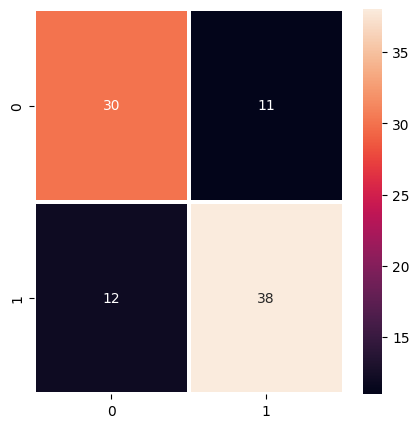

array([[30, 11],
       [12, 38]], dtype=int64)

In [13]:
y_true = y_test
y_pred = svc.predict(x_test)
plot_confusionMatrix(y_true,y_pred)

# Random Forest Classification

In [14]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=50,random_state=1)
rfc.fit(x_train,y_train)
rfc_score = rfc.score(x_test,y_test)
score_list["RFC"]=rfc_score

print(f"Score is {rfc_score}")

Score is 0.7362637362637363


Random Forest score is 73%


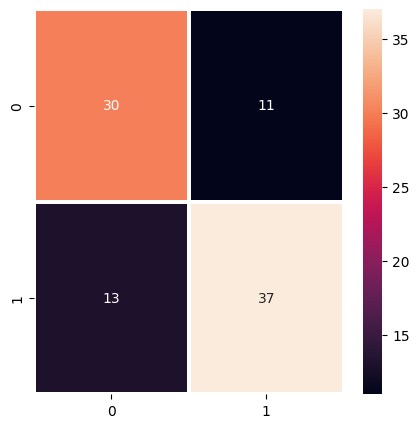

array([[30, 11],
       [13, 37]], dtype=int64)

In [15]:
y_true = y_test
y_pred = rfc.predict(x_test)
plot_confusionMatrix(y_true,y_pred)

# Final Score

In [16]:
score_list = list(score_list.items())
for alg,score in score_list:
    print(f"{alg} Score is {str(score)[:4]} ")

KNN Classifier Score is 0.75 
SVC Score is 0.74 
RFC Score is 0.73 


# Some Visualizations

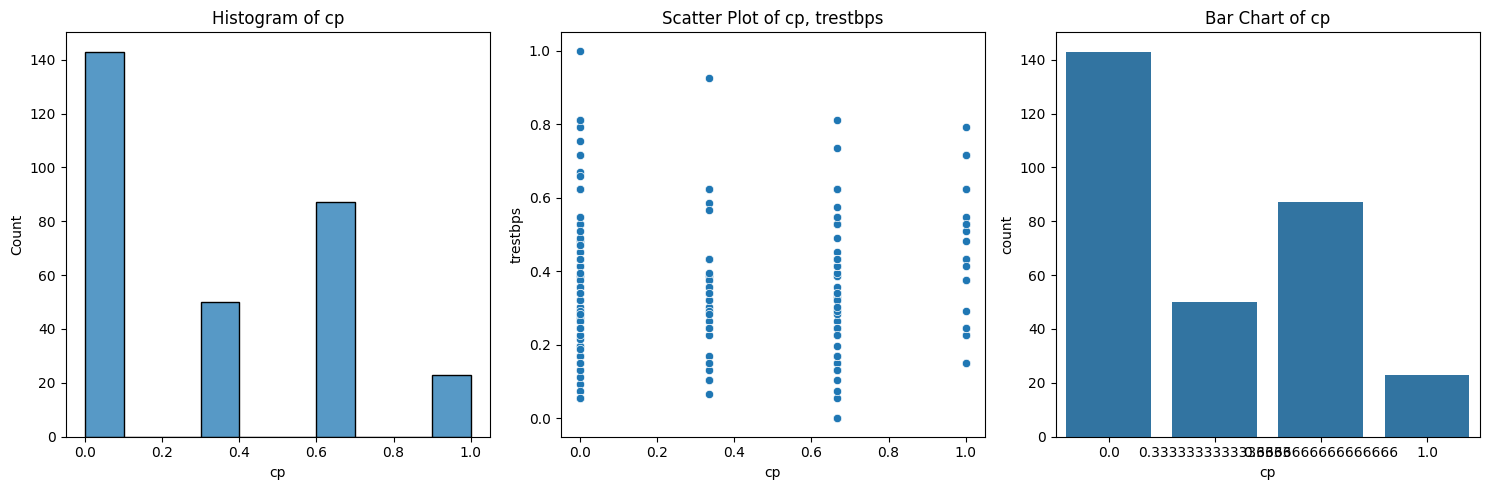

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

ig, axs = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(data['cp'], ax=axs[0])
axs[0].set_title('Histogram of cp')

sns.scatterplot(data=data, x='cp', y='trestbps', ax=axs[1])
axs[1].set_title('Scatter Plot of cp, trestbps')

sns.countplot(data=data, x='cp', ax=axs[2])
axs[2].set_title('Bar Chart of cp')

plt.tight_layout()
plt.show()